In [2]:
import numpy as np
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create a connection to the Database
conn = sqlite3.connect('database.sqlite')


# Data Understanding

In [4]:
tables = pd.read_sql("""SELECT name
                          FROM sqlite_master
                         WHERE type= 'table';""",conn)
tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


For now, my focus would be on investigating the leagues and clubs in each league.
> The Country, League, Team and Match tables looks more useful for this purpose and would be investigated 

### Leagues in Each Country

In [5]:
countries = pd.read_sql_query("""SELECT *
                                   FROM Country;""",conn)
countries                            

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


- There are 10 leagues from 10 different countries in the dataset. All of which are the top division in each country

In [7]:
leagues = pd.read_sql("""SELECT l.country_id, c.name country, l.name league
                           FROM Country c
                           JOIN League l
                             ON c.id = l.country_id;""", conn)
leagues                      

,country_id,country,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


### List of Teams

In [8]:
teams = pd.read_sql_query("""SELECT *
                               FROM Team
                              ORDER BY team_long_name;""",conn)

teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29.0,1. FC Kaiserslautern,KAI
1,15624,8722,31.0,1. FC Köln,FCK
2,16239,8165,171.0,1. FC Nürnberg,NUR
3,16243,9905,169.0,1. FSV Mainz 05,MAI
4,11817,8576,614.0,AC Ajaccio,AJA
...,...,...,...,...,...
294,43800,9868,1742.0,Xerez Club Deportivo,XER
295,31928,8021,110749.0,Zagłębie Lubin,ZAG
296,33855,8027,112512.0,Zawisza Bydgoszcz,ZAW
297,11822,4087,111271.0,Évian Thonon Gaillard FC,ETG


### List of Matches

In [9]:
match = pd.read_sql_query("""SELECT *
                               FROM Match;""",conn)

match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Checking which column doesnt contain null values
non_null = match.isnull().any()
non_null[non_null == False].index

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal'],
      dtype='object')

- Further investigation of the Match columns reveals that the columns without null value would be okay for my investigation
> So i"ll go ahead and drop all columns with null value

In [11]:
matches = match.dropna(axis=1)
print(matches.shape)
matches.head(3)

(25979, 11)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3


In [12]:
# How many soccer seasons are in the dataset?
len(matches['season'].unique())

8

In [13]:
leagues

,country_id,country,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


In [14]:
matches.dtypes

id                   int64
country_id           int64
league_id            int64
season              object
stage                int64
date                object
match_api_id         int64
home_team_api_id     int64
away_team_api_id     int64
home_team_goal       int64
away_team_goal       int64
dtype: object

In [15]:
leagues.dtypes

country_id     int64
country       object
league        object
dtype: object

- Now lets start asking questions

# Analysis of Match results With Respect to Leagues
- Over the 8 seasons, what % ends in draw, Home, and away win

In [16]:
# Join the league and matches table
league_matches = leagues.merge(matches, on='country_id')
league_matches.head()

,country_id,country,league,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,Belgium Jupiler League,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium,Belgium Jupiler League,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium,Belgium Jupiler League,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium,Belgium Jupiler League,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [17]:
league_matches.drop(columns=['id','league_id'],inplace = True)

In [18]:
league_matches.head(2)

,country_id,country,league,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0


In [19]:
league_matches.duplicated().sum()

0

In [20]:
league_matches

,country_id,country,league,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,24558,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,24558,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,24558,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


### Helper Function
> Function to help in our analysis

In [21]:
def match_result(home_goals, away_goals):
    """This function determines the final result based on the number of goals scored by the home and away team
        It returns the result"""
    if (home_goals > away_goals):
        return 'Home'
    elif (home_goals < away_goals):
        return 'Away'
    else:
        return 'Tie'

 > Get the Result of all the league matches played

In [22]:
league_matches['result'] = league_matches.apply(lambda game: match_result(game['home_team_goal'],game['away_team_goal']), axis=1)
league_matches.head()

,country_id,country,league,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Tie
1,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Tie
2,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Away
3,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Home
4,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Away


In [23]:
league_matches.isna().any()

country_id          False
country             False
league              False
season              False
stage               False
date                False
match_api_id        False
home_team_api_id    False
away_team_api_id    False
home_team_goal      False
away_team_goal      False
result              False
dtype: bool

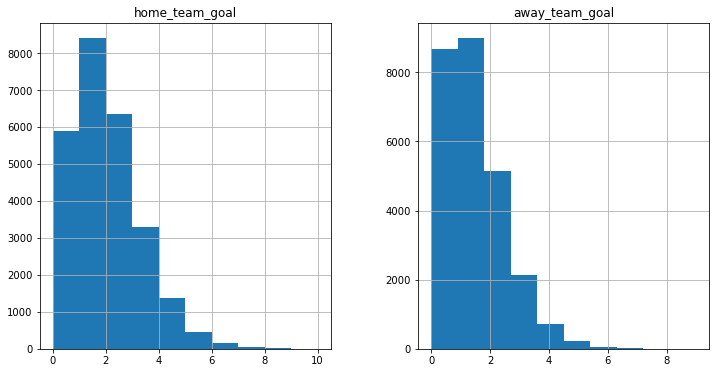

In [24]:
league_matches[['home_team_goal','away_team_goal']].hist(figsize=(12,6));

## What Is the Distribution Of Match Outcomes?

In [25]:
league_result = league_matches['result'].value_counts(normalize=True).to_frame()
league_result

,result
Home,0.458717
Away,0.287386
Tie,0.253897


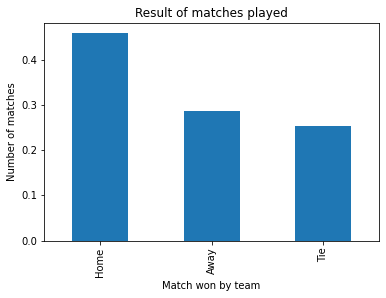

In [26]:
league_result.result.plot(kind='bar')
plt.title('Result of matches played')
plt.xlabel('Match won by team')
plt.ylabel('Number of matches');

> The home team winning clearly happens alot more than other results, but by what percent?

### Getting Result Proportion(%)

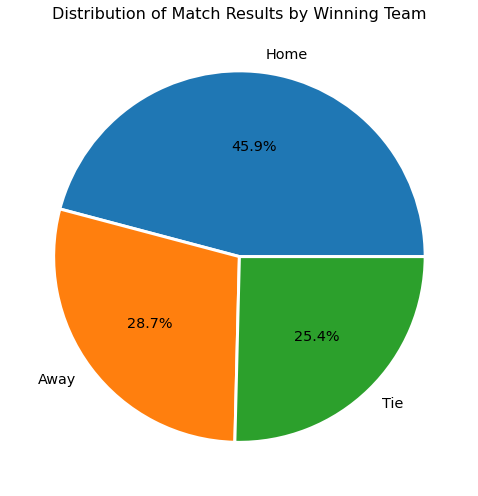

In [27]:
plt.figure(figsize=(7,7))
pie_labels = list(league_result.index)
# the autopct argument to show the percent value inside each piece of the pie.
plt.pie(list(league_result['result']), labels = pie_labels, autopct='%1.1f%%',
             wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
             textprops={'size': 'x-large'});
plt.title('Distribution of Match Results by Winning Team',fontsize=16);
plt.tight_layout()

## What Is the Distribution of Match Result in each league?

In [28]:
league_matches_result = league_matches[['league','result']].value_counts().to_frame().reset_index()
league_matches_result = league_matches_result.sort_values(by=['result',0],ascending=[True,True]).set_index(['league','result'])
league_matches_result.head()

,,0
league,result,
Switzerland Super League,Away,426
Belgium Jupiler League,Away,493
Poland Ekstraklasa,Away,525
Portugal Liga ZON Sagres,Away,611
Scotland Premier League,Away,617


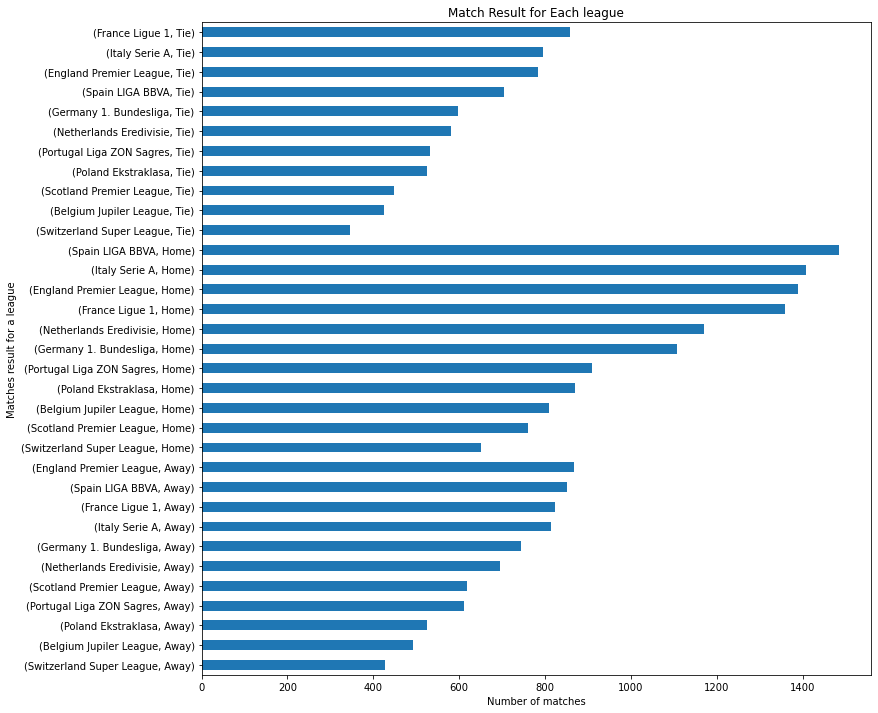

In [29]:
league_matches_result[0].plot(kind='barh',figsize=(12,12));
plt.xlabel('Number of matches')
plt.ylabel('Matches result for a league')
plt.title('Match Result for Each league');

- From the above we can easily conclude on which league had more home win, away win or draw. However I would like to point out the need to use proportion instead of count, lets start by investigating the number of games that were played in each league across the 8 seasons

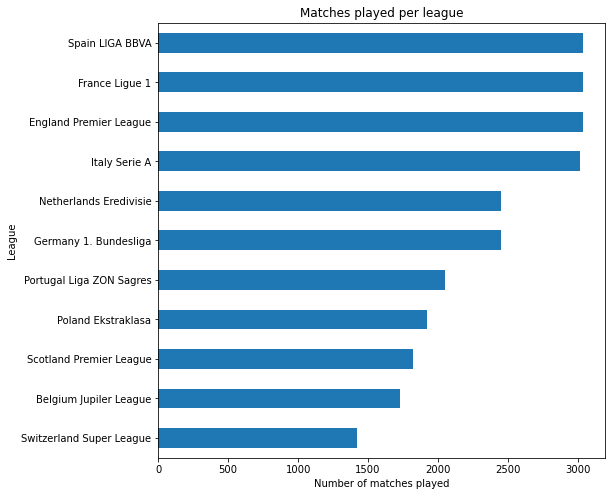

In [122]:
total_match_per_league = league_matches.groupby(['league'])['home_team_goal'].count().sort_values()
total_match_per_league.plot(kind='barh', figsize=(8,8));
plt.xlabel('Number of matches played')
plt.ylabel('League')
plt.title('Matches played per league');


- We can see some leagues had lesser number of games played, this is majorly because some leagues dont have upto 20 teams in their top leagues, for example the scotland premier has only 12 teams in its top division, swiss has 10, etc. NOW YOU SEE WHY WE NEED TO USE PROPORTIONS?

In [123]:
# Change a to a dataframe so I can apply the Merge function on it 
total_match_per_league = total_match_per_league.to_frame().reset_index()

In [124]:
result_count_per_league= league_matches.groupby(['league','result'])['home_team_goal'].count().to_frame().reset_index()
result_count_per_league.head()

,league,result,home_team_goal
0,Belgium Jupiler League,Away,493
1,Belgium Jupiler League,Home,810
2,Belgium Jupiler League,Tie,425
3,England Premier League,Away,867
4,England Premier League,Home,1390


In [126]:
# Merge tables to get result proportion (prop.)
prop = total_match_per_league.merge(result_count_per_league, on='league')
prop['proportion'] = prop['home_team_goal_y']/prop['home_team_goal_x']

# Set variables to be ploted on the y axis of bar chart as index
prop_indexed = prop.sort_values(by=['result','proportion'],ascending=[True,True]).set_index(['league','result'])


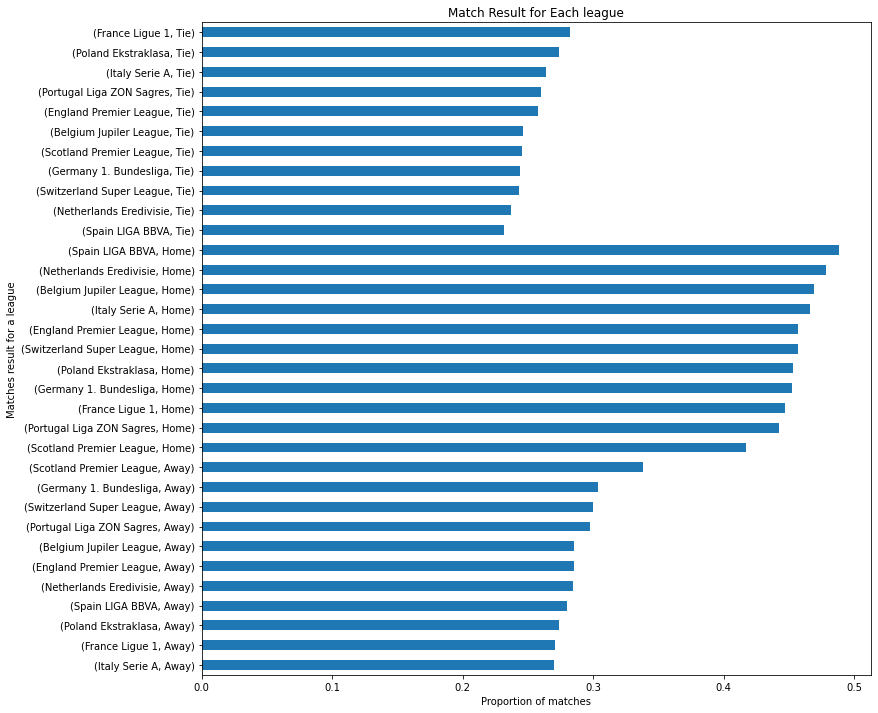

In [127]:
prop_indexed['proportion'].plot(kind='barh', figsize=(12,12));
plt.xlabel('Proportion of matches')
plt.ylabel('Matches result for a league')
plt.title('Match Result for Each league');

# Analysis of Match Goals with respect to Teams

In [35]:
# Recap on tables that would be used for this analysis
league_matches.head(2)

,country_id,country,league,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Tie
1,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Tie


In [36]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29.0,1. FC Kaiserslautern,KAI
1,15624,8722,31.0,1. FC Köln,FCK
2,16239,8165,171.0,1. FC Nürnberg,NUR
3,16243,9905,169.0,1. FSV Mainz 05,MAI
4,11817,8576,614.0,AC Ajaccio,AJA


In [37]:
# Merge twice cause we need both the home and away team
team_matches = teams.merge(league_matches, left_on='team_api_id',right_on='home_team_api_id')\
                    .merge(teams,left_on='away_team_api_id',right_on='team_api_id')

### Remove unwanted columns

In [38]:
# View index number and label for each column in team_matches
for i, v in enumerate(team_matches.columns):
    print(i,v)

0 id_x
1 team_api_id_x
2 team_fifa_api_id_x
3 team_long_name_x
4 team_short_name_x
5 country_id
6 country
7 league
8 season
9 stage
10 date
11 match_api_id
12 home_team_api_id
13 away_team_api_id
14 home_team_goal
15 away_team_goal
16 result
17 id_y
18 team_api_id_y
19 team_fifa_api_id_y
20 team_long_name_y
21 team_short_name_y


- Selecting Multiple Ranges

In [39]:
list_unwanted_col = np.r_[0:3, 4:7, 9:14, 17:20, 21]
list_unwanted_col


array([ 0,  1,  2,  4,  5,  6,  9, 10, 11, 12, 13, 17, 18, 19, 21])

In [40]:
team_matches_cleaned = team_matches.drop(team_matches.iloc[:,list_unwanted_col],axis=1)
team_matches_cleaned.rename(columns={'team_long_name_x':'home_team','team_long_name_y':'away_team'},inplace=True)
team_matches_cleaned = team_matches_cleaned[['league','season','home_team','away_team','home_team_goal', 'away_team_goal','result']]
team_matches_cleaned.head()


,league,season,home_team,away_team,home_team_goal,away_team_goal,result
0,Germany 1. Bundesliga,2010/2011,1. FC Kaiserslautern,Borussia Mönchengladbach,3,0,Home
1,Germany 1. Bundesliga,2011/2012,1. FC Kaiserslautern,Borussia Mönchengladbach,1,2,Away
2,Germany 1. Bundesliga,2008/2009,1. FC Köln,Borussia Mönchengladbach,2,4,Away
3,Germany 1. Bundesliga,2009/2010,1. FC Köln,Borussia Mönchengladbach,1,1,Tie
4,Germany 1. Bundesliga,2010/2011,1. FC Köln,Borussia Mönchengladbach,0,4,Away


In [41]:
team_matches_cleaned.shape

(25979, 7)

In [42]:
team_matches_cleaned.isna().any()

league            False
season            False
home_team         False
away_team         False
home_team_goal    False
away_team_goal    False
result            False
dtype: bool

### Dedupe Team_matches data

In [43]:
team_matches_cleaned.duplicated().sum()

117

In [44]:
team_matches_cleaned.drop_duplicates(inplace=True)

In [45]:
team_matches_cleaned.duplicated().sum()

0

### Exporing Goal Distribution

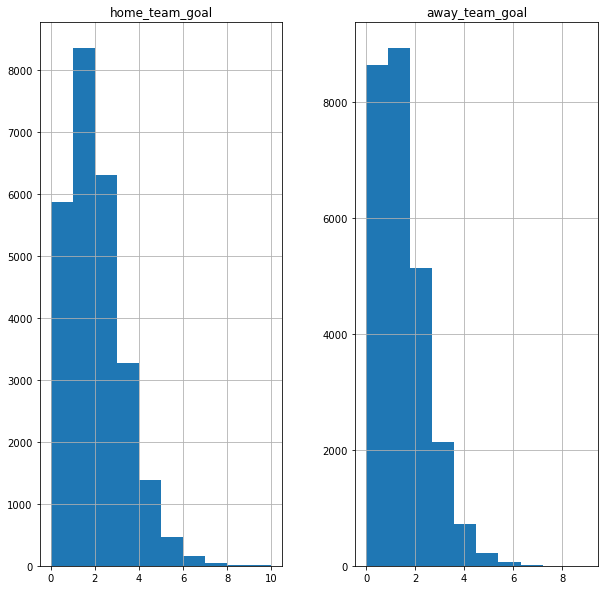

In [46]:
team_matches_cleaned.hist(figsize=(10,10));

## Highest scoring Home team

In [49]:
team_matches_cleaned.head()

,league,season,home_team,away_team,home_team_goal,away_team_goal,result
0,Germany 1. Bundesliga,2010/2011,1. FC Kaiserslautern,Borussia Mönchengladbach,3,0,Home
1,Germany 1. Bundesliga,2011/2012,1. FC Kaiserslautern,Borussia Mönchengladbach,1,2,Away
2,Germany 1. Bundesliga,2008/2009,1. FC Köln,Borussia Mönchengladbach,2,4,Away
3,Germany 1. Bundesliga,2009/2010,1. FC Köln,Borussia Mönchengladbach,1,1,Tie
4,Germany 1. Bundesliga,2010/2011,1. FC Köln,Borussia Mönchengladbach,0,4,Away


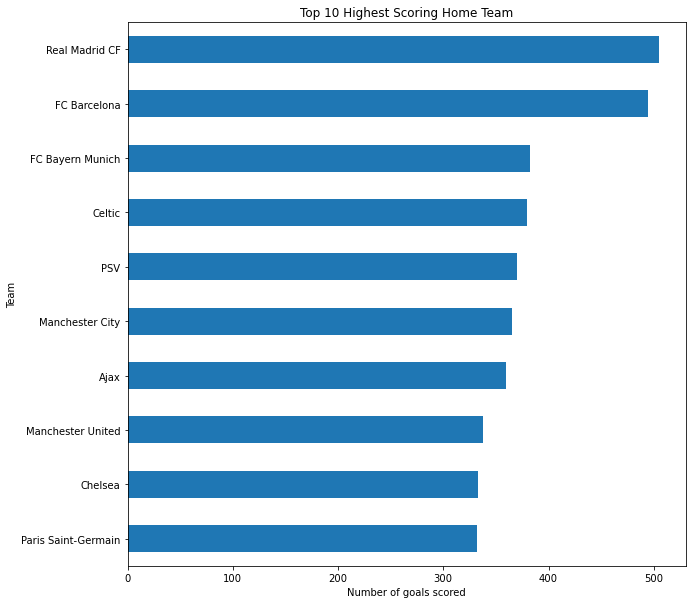

In [65]:
team_matches_cleaned.groupby('home_team')['home_team_goal'].sum().sort_values().tail(10).plot(kind='barh',figsize=(10,10))
plt.xlabel('Number of goals scored')
plt.ylabel('Team')
plt.title('Top 10 Highest Scoring Home Team');

## Lowest scoring Home team

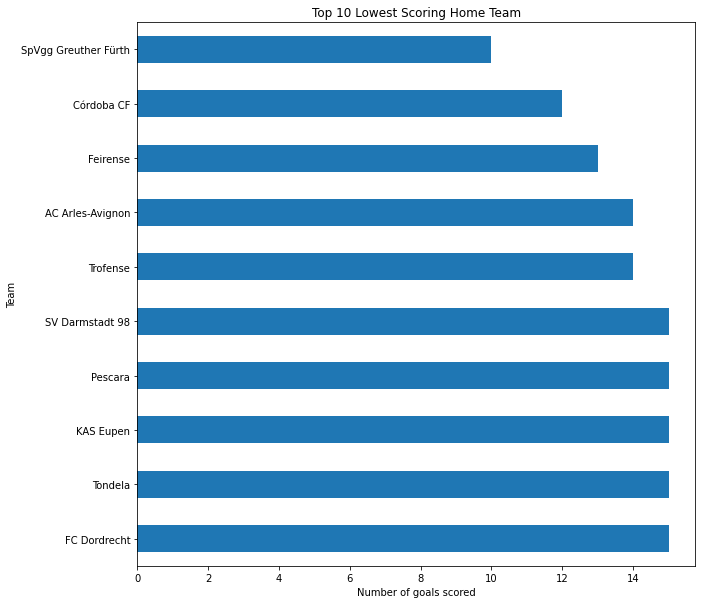

In [85]:
team_matches_cleaned.groupby('home_team')['home_team_goal'].sum().sort_values(ascending=False).tail(10).plot(kind='barh',figsize=(10,10))
plt.xlabel('Number of goals scored')
plt.ylabel('Team')
plt.title('Top 10 Lowest Scoring Home Team');

## Highest scoring Away team

In [71]:
team_matches_cleaned.head(5)

,league,season,home_team,away_team,home_team_goal,away_team_goal,result
0,Germany 1. Bundesliga,2010/2011,1. FC Kaiserslautern,Borussia Mönchengladbach,3,0,Home
1,Germany 1. Bundesliga,2011/2012,1. FC Kaiserslautern,Borussia Mönchengladbach,1,2,Away
2,Germany 1. Bundesliga,2008/2009,1. FC Köln,Borussia Mönchengladbach,2,4,Away
3,Germany 1. Bundesliga,2009/2010,1. FC Köln,Borussia Mönchengladbach,1,1,Tie
4,Germany 1. Bundesliga,2010/2011,1. FC Köln,Borussia Mönchengladbach,0,4,Away


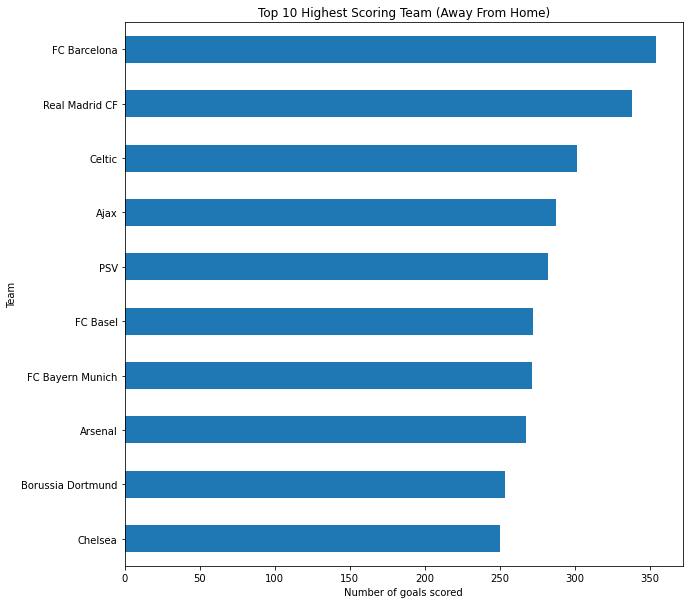

In [73]:
team_matches_cleaned.groupby('away_team')['away_team_goal'].sum().sort_values().tail(10).plot(kind='barh',figsize=(10,10))
plt.xlabel('Number of goals scored')
plt.ylabel('Team')
plt.title('Top 10 Highest Scoring Team (Away From Home)');

## Lowest scoring Away team

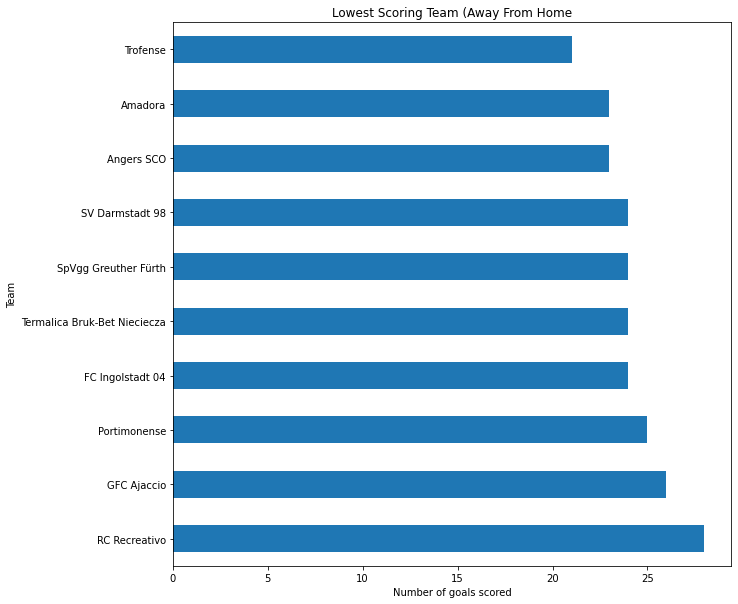

In [89]:
team_matches_cleaned.groupby('away_team')['home_team_goal'].sum().sort_values(ascending=False).tail(10).plot(kind='barh',figsize=(10,10))
plt.xlabel('Number of goals scored')
plt.ylabel('Team')
plt.title('Lowest Scoring Team (Away From Home');

- Recall that the number of games tracked by the dataset differs for each league (as shown when analyzing match result for each league). This would have definately affected the number of goals for each team (as some of them have lesser number of games tracked by the dataset also)

In [90]:
# calculate total matches played and total goals scored by each team
matches_as_home_team =  team_matches_cleaned.groupby('home_team').count()
matches_as_away_team =  team_matches_cleaned.groupby('away_team').count()

goals_as_home_team = team_matches_cleaned.groupby('home_team')['home_team_goal'].sum()
goals_as_away_team = team_matches_cleaned.groupby('away_team')['away_team_goal'].sum()

<AxesSubplot:>

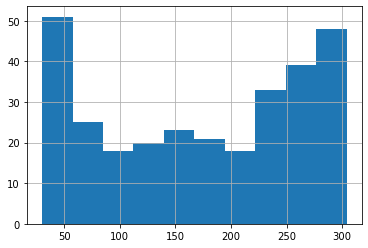

In [100]:
# Getting the total match played for each team
total_team_matches = matches_as_home_team.season + matches_as_away_team.season
total_team_matches.sort_values(ascending=False).hist()

In [118]:
total_team_matches.describe()

count    296.000000
mean     174.743243
std       95.793537
min       30.000000
25%       76.000000
50%      190.000000
75%      266.000000
max      304.000000
Name: season, dtype: float64

> The Histogram and info above confirms that different teams have different amount of games tracked (with some very very low)

## Highest Goal scoring Team

In [104]:
total_team_goal = goals_as_home_team + goals_as_away_team
total_team_goal.sort_values(ascending=False).head()

home_team
FC Barcelona        849
Real Madrid CF      843
Celtic              681
FC Bayern Munich    653
PSV                 652
dtype: int64

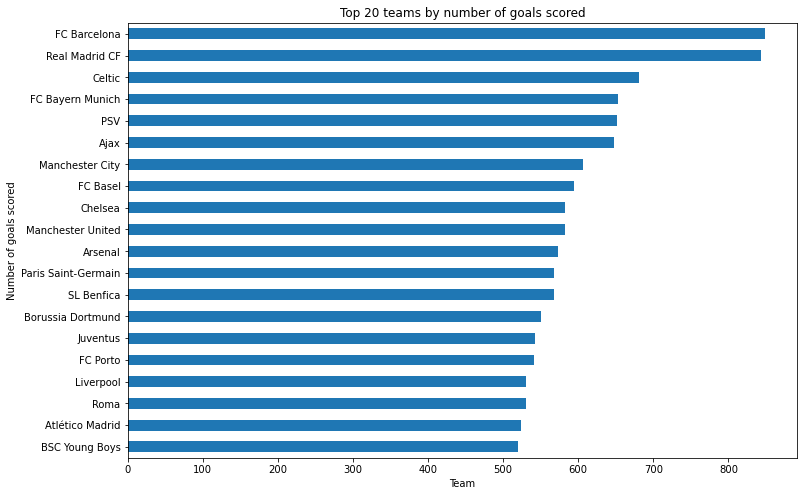

In [108]:
# Visualization of highest scoring teams
total_team_goal.sort_values().tail(20).plot(kind='barh', figsize=(12,8))
plt.title('Top 20 teams by number of goals scored')
plt.xlabel('Team')
plt.ylabel('Number of goals scored');

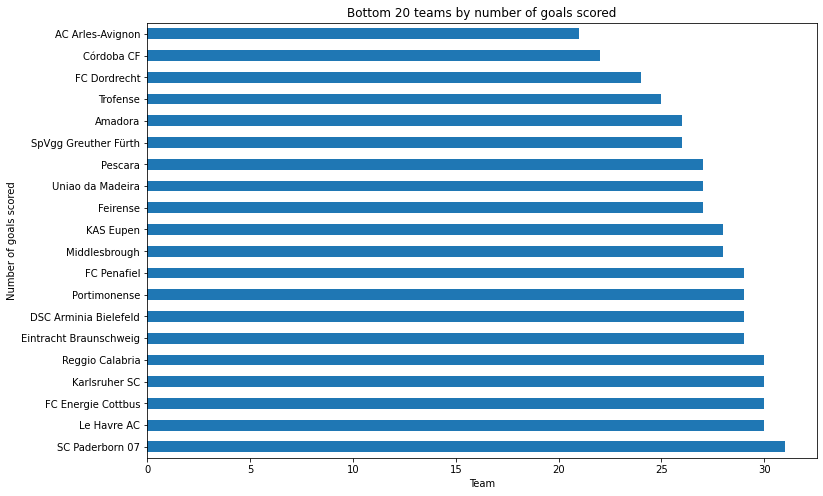

In [112]:
total_team_goal.sort_values(ascending=False).tail(20).plot(kind='barh', figsize=(12,8))
plt.title('Bottom 20 teams by number of goals scored')
plt.xlabel('Team')
plt.ylabel('Number of goals scored');

## Leagues Goal To Game Ratio
- To get this, I would be dividing the total number of goals scored by total games played in each league

In [133]:
# The total games for each league was already analyzed earlier
total_match_per_league

,league,home_team_goal
0,Switzerland Super League,1422
1,Belgium Jupiler League,1728
2,Scotland Premier League,1824
3,Poland Ekstraklasa,1920
4,Portugal Liga ZON Sagres,2052
5,Germany 1. Bundesliga,2448
6,Netherlands Eredivisie,2448
7,Italy Serie A,3017
8,England Premier League,3040
9,France Ligue 1,3040


In [135]:
# Get the sum of home goals scored in each league
home_goals_per_league = team_matches_cleaned.groupby('league')['home_team_goal'].sum()
home_goals_per_league

league
Belgium Jupiler League      2781
England Premier League      4715
France Ligue 1              4265
Germany 1. Bundesliga       3982
Italy Serie A               4528
Netherlands Eredivisie      4357
Poland Ekstraklasa          2663
Portugal Liga ZON Sagres    2890
Scotland Premier League     2539
Spain LIGA BBVA             4959
Switzerland Super League    2298
Name: home_team_goal, dtype: int64

In [136]:
# Get the sum of away goals scored in each league
away_goals_per_league = team_matches_cleaned.groupby('league')['away_team_goal'].sum()
away_goals_per_league

league
Belgium Jupiler League      2060
England Premier League      3525
France Ligue 1              3162
Germany 1. Bundesliga       3121
Italy Serie A               3367
Netherlands Eredivisie      3185
Poland Ekstraklasa          1972
Portugal Liga ZON Sagres    2311
Scotland Premier League     2149
Spain LIGA BBVA             3453
Switzerland Super League    1762
Name: away_team_goal, dtype: int64

In [137]:
# Get the sum of total goals scored in each league
total_goals_per_league = home_goals_per_league + away_goals_per_league
total_goals_per_league

league
Belgium Jupiler League      4841
England Premier League      8240
France Ligue 1              7427
Germany 1. Bundesliga       7103
Italy Serie A               7895
Netherlands Eredivisie      7542
Poland Ekstraklasa          4635
Portugal Liga ZON Sagres    5201
Scotland Premier League     4688
Spain LIGA BBVA             8412
Switzerland Super League    4060
dtype: int64

In [119]:
conn.close()

# CONCLUSIONS

**What is the most likely outcome of a Match (Home or Away)?**
> In a match the Home team is more likely to win the game, this is because almost 46% of the matches played thus far have been won by the home team while the away team won nearly 29% and about 25% for a stalemate. Hence its likely that a home team has greater chances of winning a match.

**Which league has the Highest proportion of Home Wins?**
> The Spanish Laliga has the highest Proportion of games ending in a Home win with over 45% of matches ending in favour of the Home team. Followed in second is the Deutch League (Eredevise)

**Which league has the Lowest?**
> The scottish league has the lowest proportion of Home wins 



**Which league has the Highest proportion of Away Wins?**
> The scottish league has the Highest proportion of Away wins, infact they are the only league with over 32% away wins
The French Ligue 1 has the highest proportion of games ending in a Draw



**Which league has the Highest proportion of Draws?**
>The French Ligue 1 has the highest proportion of games ending in a Draw



**Highest Scoring Team?**
> FC Barcelona have scored the maximum number of goals thus far (849). Away from home, Barcelona are also the highest scoring team with 354 goals



**Lowest Scoring Team?**
> AC Arles-Avignon have scored the least number of goals thus far (21)